In [2]:
import torch #Pytorch
import torch.nn as nn #Pytorch neural network module
from torch.optim import SGD #Optimization Algorithms
import torch.nn.functional as F #Encodes the dataset
from torch.utils.data import Dataset, DataLoader #Used for managing data
import torchvision #Various resources for computer vision
import numpy as np #Handles high-level math operations
import matplotlib.pyplot as plt #Plot data for visualization

## Dataset

In [3]:
x,y = torch.load('MNIST/processed/training.pt')

/var/folders/vj/rxr6zwfn3rl3x08myxqw9ftw0000gn/T/ipykernel_16214/1099657051.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  x,y = torch.load('MNIST/processed/training.pt

In [4]:
x.shape #x holds 60000 28*28 2D images
x[0].numpy()

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y.shape # y hold 60000 labels
y[0].numpy()

array(5)

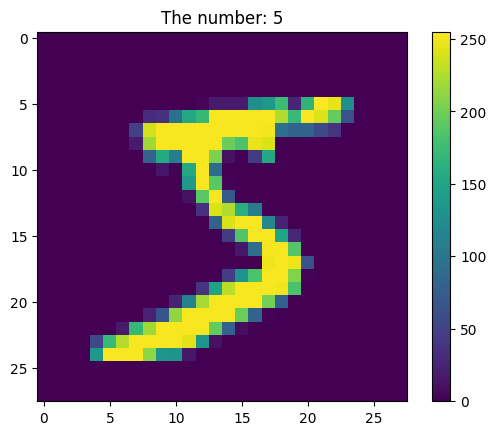

In [6]:
plt.imshow(x[0].numpy()) #Plots the image at x[0]
plt.title(f'The number: {y[0].numpy()}') #Label assiciated with x[0]
plt.colorbar() #Colorbar alongside graph
plt.show()


## The One Hot Encoder

In [7]:
y_original = torch.tensor([2, 4, 3, 0, 1])

In [8]:
#Binary representation of the  classes in y_original
F.one_hot(y_original)

tensor([[0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0],
        [1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0]])

In [9]:
y_new = F.one_hot(y, num_classes=10) #Specify 10 classes in y
y_new.shape

torch.Size([60000, 10])

In [10]:
y_new
"""We can look and the output as a PMF
    which will later be used when training"""

'We can look and the output as a PMF\n    which will later be used when training'

## Transforming Images

In [11]:
x.shape

torch.Size([60000, 28, 28])

In [12]:
x.view(-1,28**2).shape #tranform each image to a vector

torch.Size([60000, 784])

## PyTorch Dataset Object

In [13]:
Dataset?

Init signature: Dataset()
Docstring:     
An abstract class representing a :class:`Dataset`.

All datasets that represent a map from keys to data samples should subclass
it. All subclasses should overwrite :meth:`__getitem__`, supporting fetching a
data sample for a given key. Subclasses could also optionally overwrite
:meth:`__len__`, which is expected to return the size of the dataset by many
:class:`~torch.utils.data.Sampler` implementations and the default options
of :class:`~torch.utils.data.DataLoader`. Subclasses could also
optionally implement :meth:`__getitems__`, for speedup batched samples
loading. This method accepts list of indices of samples of batch and returns
list of samples.

.. note::
  :class:`~torch.utils.data.DataLoader` by default constructs an index
  sampler that yields integral indices.  To make it work with a map-style
  dataset with non-integral indices/keys, a custom sampler must be provided.
File:           ~/.pyenv/versions/3.11.11/lib/python3.11/site-pac

In [14]:
#Define our own class
class CTDataset(Dataset):
    def __init__(self, filepath) -> None:
        self.x, self.y = torch.load(filepath) #Load data from filepath
        self.x = self.x / 255 #Normalize data in x to between 0 and 1
        self.y = F.one_hot(self.y, num_classes=10).to(float) #Simply show as 0.0 or 1.0
    def __len__(self) -> int:
        return self.x.shape[0]#Return the number of images in x
    def __getitem__(self, ix):
        return self.x[ix], self.y[ix] #Return image and label at ix

In [15]:
train_ds = CTDataset('MNIST/processed/training.pt')
test_ds = CTDataset('MNIST/processed/test.pt')

/var/folders/vj/rxr6zwfn3rl3x08myxqw9ftw0000gn/T/ipykernel_16214/2246059733.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.x, self.y = torch.load(filepath) #Load d

In [16]:
len(train_ds) #Using __len__

60000

In [17]:
train_ds[0] #Using __getitem__

(tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000,

## DataLoader Object

We can use the Dataloader class to  specify a `bath_size` when training

In [18]:
DataLoader?

Init signature:
DataLoader(
    dataset: torch.utils.data.dataset.Dataset[+_T_co],
    batch_size: Optional[int] = 1,
    shuffle: Optional[bool] = None,
    sampler: Union[torch.utils.data.sampler.Sampler, Iterable, NoneType] = None,
    batch_sampler: Union[torch.utils.data.sampler.Sampler[List], Iterable[List], NoneType] = None,
    num_workers: int = 0,
    collate_fn: Optional[Callable[[List[~_T]], Any]] = None,
    pin_memory: bool = False,
    drop_last: bool = False,
    timeout: float = 0,
    worker_init_fn: Optional[Callable[[int], NoneType]] = None,
    multiprocessing_context=None,
    generator=None,
    *,
    prefetch_factor: Optional[int] = None,
    persistent_workers: bool = False,
    pin_memory_device: str = '',
)
Docstring:     
Data loader combines a dataset and a sampler, and provides an iterable over the given dataset.

The :class:`~torch.utils.data.DataLoader` supports both map-style and
iterable-style datasets with single- or multi-process loading, customizin

Dividing dataset of 60000 elements to 12000 batches of 5 images.

In [19]:
train_dl = DataLoader(train_ds, batch_size=5)

In [20]:
for x, y in train_dl:
    print(x.shape)
    print(y.shape)
    break

torch.Size([5, 28, 28])
torch.Size([5, 10])


In [21]:
len(train_dl) #Number of batches held by train_dl

12000

## Loss Function

In [44]:
L = nn.CrossEntropyLoss() #Loss function used to train model

## The Network

In [30]:
class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__() #Inherit __init__ from nn.Module
        #nn.linear defines a dense layer which performs linear transformations
        self.Matrix1 = nn.Linear(28**2, 100) #28^2 inputs and 100 output features 
        self.Matrix2 = nn.Linear(100,50) #100 inputs and 50 output features
        self.Matrix3 = nn.Linear(50,10) #50 inputs and 10 output features
        self.R = nn.ReLU()
    def forward(self,x):
        x = x.view(-1, 28**2) #Turn each image into a 28^2 vector
        x = self.R(self.Matrix1(x)) #Feed into first layer
        x = self.R(self.Matrix2(x)) #Feed into the second layer
        x = self.Matrix3(x) #Feed into third layer
        return x.squeeze() 

In [31]:
f = NeuralNet()

Look at network predictions before optimazation:

In [36]:
x.shape #One batch

torch.Size([5, 28, 28])

Returns 5 PMF's (currenty random because not yet optimized)

In [41]:
print(f'{f(x)}')
print(f'{f(x).shape}')

tensor([[ 0.1146, -0.0337,  0.0698, -0.0843,  0.0650,  0.0535,  0.0328,  0.0070,
         -0.0701,  0.0105],
        [ 0.0698, -0.0234,  0.0696, -0.1160,  0.0454,  0.0217,  0.0310,  0.0550,
         -0.0795, -0.0125],
        [ 0.0766, -0.0056,  0.0629, -0.1263,  0.0645,  0.0269,  0.0319,  0.0325,
         -0.0757, -0.0169],
        [ 0.0764, -0.0217,  0.0380, -0.1265,  0.0579,  0.0391,  0.0302,  0.0380,
         -0.0561, -0.0489],
        [ 0.0876,  0.0036,  0.0453, -0.1041,  0.0478,  0.0568,  0.0493,  0.0440,
         -0.0673, -0.0190]], grad_fn=<SqueezeBackward0>)
torch.Size([5, 10])


Eventually should be as close as possible to this after optimization

In [42]:
y

tensor([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=torch.float64)

L computes the loss between predictions of f(x) and y. We adjust the weights of f such that the output of L is as small as possible

In [45]:
L(f(x), y)

tensor(2.2843, dtype=torch.float64, grad_fn=<DivBackward1>)

## Training

In [47]:
"""The function will take in the DataLoader, Neural Network
and train for 20 epochs"""
def train_model(dl,f, n_epochs=20):
    opt = SGD(f.parameters(), lr=0.01) #Stochastix Gradient Descent
    L = nn.CrossEntropyLoss() #Cross Entropy Loss Function


    #Train model
    losses = [] #Loss for each epoch
    epochs = [] #Corresponding epoch

    #for loop for each epoch
    #Optimize by going through dataset n_epochs times
    for epoch in range(n_epochs):
        print(f'Epcoch: {epoch}') #Print Current epoch
        N = len(dl) #N holds length on DataLoader
        #Retrieves one batch at a time and enumarate adds
        #an index to each batch. This will loop 12000 times
        for i, (x,y) in enumerate(dl):
            #Update the weights of the network
            opt.zero_grad()
            loss = L(f(x), y) #Compute loss
            loss.backward() #Back propagation
            opt.step() #Adjust the model parameters
            #Store training data
            epochs.append(epoch+i/N)
            losses.append(loss.item())
    return np.array(epochs), np.array(losses)    

Call training function to train model

In [48]:
#Epoch and and Loss data
epoch_data, loss_data = train_model(train_dl, f)
#12000 adjustments per epoch

Epcoch: 0
Epcoch: 1
Epcoch: 2
Epcoch: 3
Epcoch: 4
Epcoch: 5
Epcoch: 6
Epcoch: 7
Epcoch: 8
Epcoch: 9
Epcoch: 10
Epcoch: 11
Epcoch: 12
Epcoch: 13
Epcoch: 14
Epcoch: 15
Epcoch: 16
Epcoch: 17
Epcoch: 18
Epcoch: 19


Plot loss function `L(f(x, y))` for each batch for each batch (`batch_size` is 5) 

Text(0.5, 1.0, 'Cross Entropy per batch')

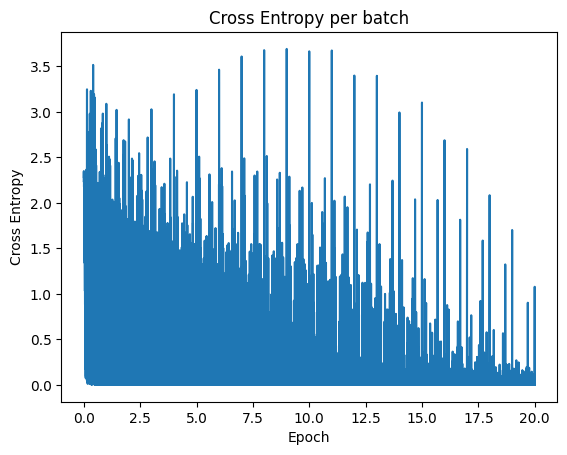

In [50]:
plt.plot(epoch_data, loss_data)
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.title('Cross Entropy per batch')

Each data point corresponds to the loss evaluated on a batch of 5 images. An entire epoch is 60000 images. We can avgerage the loss across all data per epoch to get loss across all data per epoch  to get the loss for all 60000 images

- We take the mean loss of each epoch 

A total of 240000 losses/adjustments, split in 20 equal arrays

In [51]:
epoch_data_avgd = epoch_data.reshape(20, -1).mean(axis=1)
loss_data_avgd = loss_data.reshape(20,-1).mean(axis=1)

Observe that the loss decreases as we train. Meaning the predictions get closer to the actual value as we continue to train.

Text(0.5, 1.0, 'Cross Entropy (mean per epoch)')

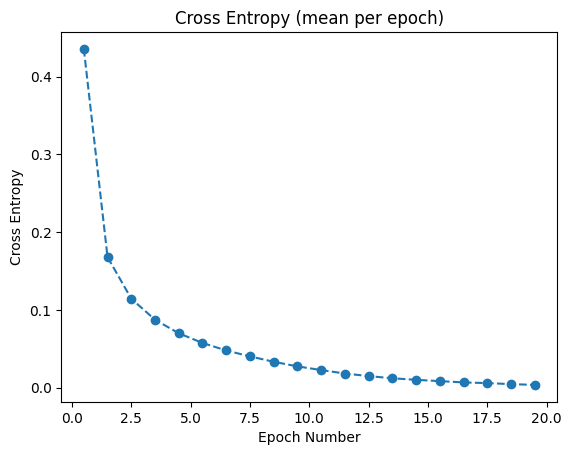

In [58]:
#Plot average loss per epoch
plt.plot(epoch_data_avgd, loss_data_avgd, 'o--')
plt.xlabel('Epoch Number')
plt.ylabel('Cross Entropy')
plt.title('Cross Entropy (mean per epoch)')

In [61]:
train_ds[0][1]

tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=torch.float64)

### Predictions on images the model network **has seen before** (Training dataset)

Look at sample prediction.
The largest value corresponds to what the prediction is

In [63]:
y_sample = train_ds[0][0] #Image to feed into neural net
yhat_sample = f(y_sample)
yhat_sample


tensor([-11.0654,  -2.4315,  -0.1828,  25.7585, -27.7236,  30.6395, -11.8804,
         -1.3793,  -6.1388,   1.3718], grad_fn=<SqueezeBackward0>)

In [64]:
torch.argmax(yhat_sample) #Take the largets argument in yhat_sample

tensor(5)

Predicts that y_sample is the number 5

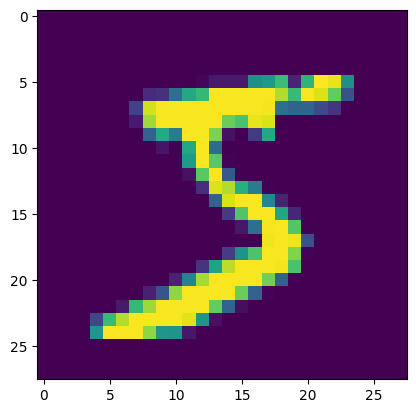

In [68]:
plt.imshow(y_sample)

We see that the Neural Network identifies the image correctly


In [69]:
xs,ys = train_ds[0:2000] #20000 images and corresponding labels

In [73]:
f(xs) #predictions for 20000 images
f(xs).shape

torch.Size([2000, 10])

In [78]:
#To get predictions in a readable manner
y_hats = f(xs).argmax(axis=1) #Get argmax from the 1st dim
print(f'{y_hats}')

tensor([5, 0, 4,  ..., 5, 2, 0])


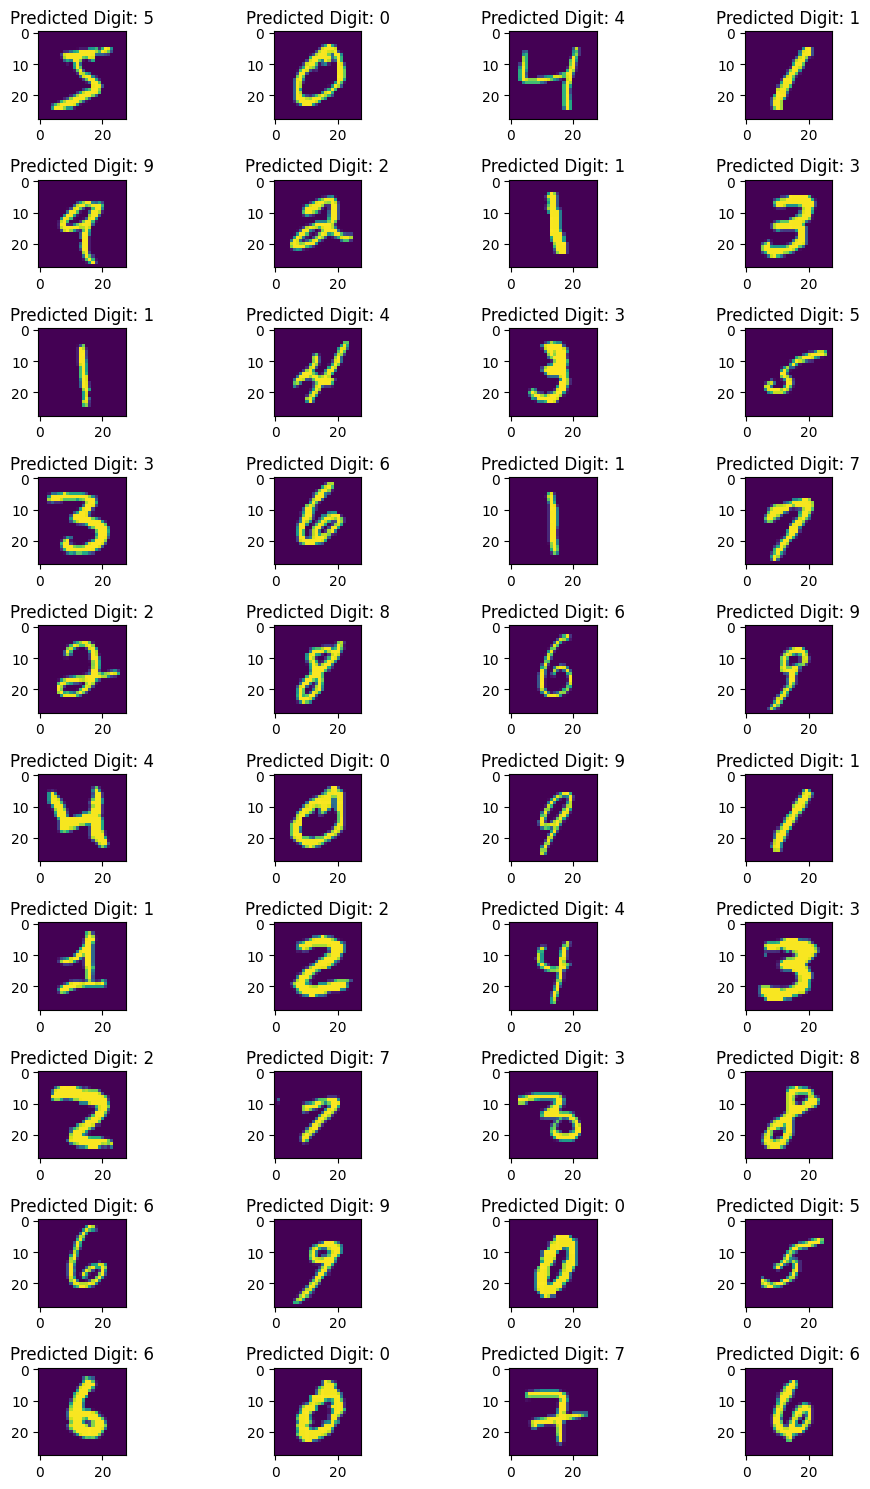

In [ ]:
#Plot first 40 images alongside their predicted label
fig, ax = plt.subplots(10, 4, figsize=(10,15)) #10 row * 4 columns
for i in range(40):
    plt.subplot(10,4,i+1)
    #Plot an image alongside its predicted label
    plt.imshow(xs[i])
    plt.title(f'Predicted Digit: {y_hats[i]}')
fig.tight_layout()
plt.show()

### Prediction on images the model **has not seen before** (Test dataset)

This is done to test the generalizability of the model

In [85]:
xs, ys = test_ds[:2000] #first 2000 images and labels
y_hats = f(xs).argmax(axis=1) #Get argmax from the 1st dim

Plot 40 predictions

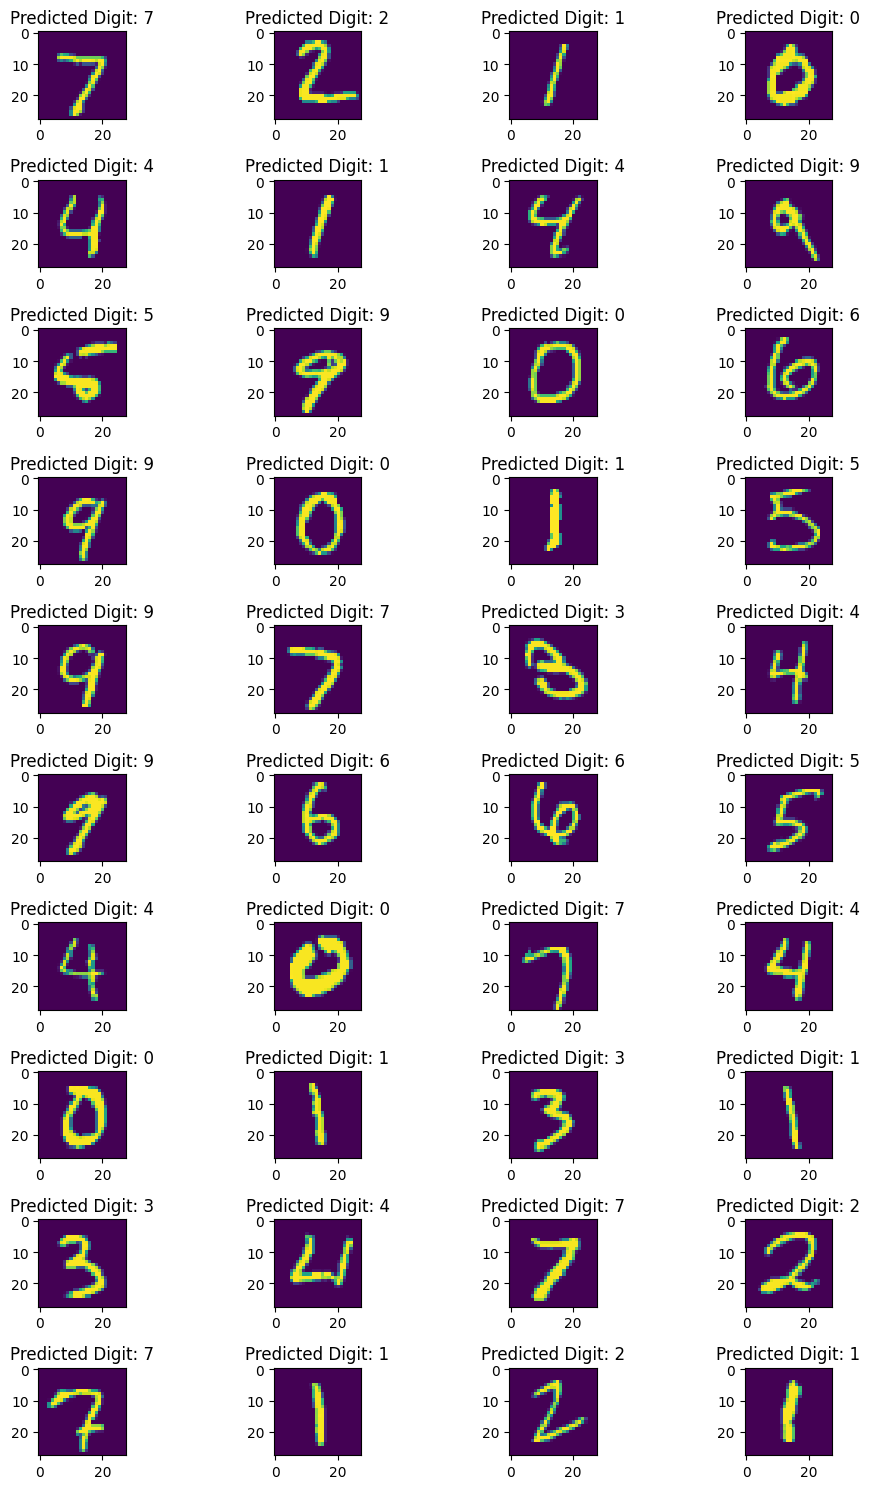

In [86]:
#Plot first 40 images alongside their predicted label
fig, ax = plt.subplots(10, 4, figsize=(10,15)) #10 row * 4 columns
for i in range(40):
    plt.subplot(10,4,i+1)
    #Plot an image alongside its predicted label
    plt.imshow(xs[i])
    plt.title(f'Predicted Digit: {y_hats[i]}')
fig.tight_layout()
plt.show()